In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import umap

# Load and prepare data
df_hypertension = pd.read_csv("/rds/general/project/hda_24-25/live/TDS/Group09/Data/full_dataset.csv")


/rds/general/user/kja24/home/anaconda3/envs/r413/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Filter protein columns and get PCA columns
metadata_keywords_and_pc = ["Systolic", "Leg.pain", "Medication", "index", "Surgery", "PAD_binary", "pc_"]
protein_columns = [
    col for col in df_hypertension.columns 
    if not any(keyword in col for keyword in metadata_keywords_and_pc)
]
df_proteins = df_hypertension[protein_columns].select_dtypes(include=[np.number])

# Get PCA columns
pca_columns = [col for col in df_hypertension.columns if col.startswith('pc_')]
df_pca = df_hypertension[pca_columns]

# Scale the data
scaler = StandardScaler()
df_proteins_scaled = scaler.fit_transform(df_proteins)
df_pca_scaled = scaler.fit_transform(df_pca)

# Apply GMM clustering
n_components = 2  # You can adjust this number
gmm_proteins = GaussianMixture(n_components=n_components, random_state=42)
gmm_pca = GaussianMixture(n_components=n_components, random_state=42)

# Fit and predict clusters
cluster_labels_proteins = gmm_proteins.fit_predict(df_proteins_scaled)
cluster_labels_pca = gmm_pca.fit_predict(df_pca_scaled)

print("Clusters in Dataset (proteins):", np.unique(cluster_labels_proteins))
print("Clusters in Dataset (PCA):", np.unique(cluster_labels_pca))

# Create visualization
# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: PCA scatter plot
ax1.scatter(df_pca_scaled[:, 0], df_pca_scaled[:, 1], 
           c=cluster_labels_pca, cmap='cividis', alpha=0.6)
ax1.set_xlabel('PC 1')
ax1.set_ylabel('PC 2')
ax1.set_title('PCA')

# Plot 2: UMAP of proteins
umap_model_proteins = umap.UMAP(n_components=2, random_state=123)
umap_result_proteins = umap_model_proteins.fit_transform(df_proteins_scaled)
ax2.scatter(umap_result_proteins[:, 0], umap_result_proteins[:, 1], 
           c=cluster_labels_proteins, cmap='plasma', alpha=0.6)
ax2.set_xlabel('UMAP 1')
ax2.set_ylabel('UMAP 2')
ax2.set_title('UMAP Projection of Proteins')

# Plot 3: UMAP of PCs
umap_model_pca = umap.UMAP(n_components=2, random_state=123)
umap_result_pca = umap_model_pca.fit_transform(df_pca_scaled)
ax3.scatter(umap_result_pca[:, 0], umap_result_pca[:, 1], 
           c=cluster_labels_pca, cmap='seismic', alpha=0.6)
ax3.set_xlabel('UMAP 1')
ax3.set_ylabel('UMAP 2')
ax3.set_title('UMAP Projection of PC')

plt.tight_layout()
plt.show()

OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.
To avoid this warning, please rebuild your copy of OpenBLAS with a larger NUM_THREADS setting
or set the environment variable OPENBLAS_NUM_THREADS to 64 or lower


In [7]:
# ... existing imports ...
from sklearn.metrics import silhouette_score


# Apply GMM clustering
n_components = 2  # You can adjust this number
gmm_proteins = GaussianMixture(n_components=n_components, random_state=42)
gmm_pca = GaussianMixture(n_components=n_components, random_state=42)

# Fit and predict clusters
cluster_labels_proteins = gmm_proteins.fit_predict(df_proteins_scaled)
cluster_labels_pca = gmm_pca.fit_predict(df_pca_scaled)

# Get cluster probabilities
cluster_probs_proteins = gmm_proteins.predict_proba(df_proteins_scaled)
cluster_probs_pca = gmm_pca.predict_proba(df_pca_scaled)

# Calculate metrics
silhouette_proteins = silhouette_score(df_proteins_scaled, cluster_labels_proteins)
silhouette_pca = silhouette_score(df_pca_scaled, cluster_labels_pca)

# Print clustering results and metrics
print("\nProtein Clustering Results:")
print("Number of clusters:", n_components)
print("Silhouette Score:", silhouette_proteins)
print("AIC Score:", gmm_proteins.aic(df_proteins_scaled))
print("BIC Score:", gmm_proteins.bic(df_proteins_scaled))
print("\nCluster Probabilities (first 5 samples):")
print(cluster_probs_proteins[:5])

print("\nPCA Clustering Results:")
print("Number of clusters:", n_components)
print("Silhouette Score:", silhouette_pca)
print("AIC Score:", gmm_pca.aic(df_pca_scaled))
print("BIC Score:", gmm_pca.bic(df_pca_scaled))
print("\nCluster Probabilities (first 5 samples):")
print(cluster_probs_pca[:5])

# Optional: Create DataFrame with cluster assignments and probabilities
cluster_results_proteins = pd.DataFrame({
    'Cluster': cluster_labels_proteins,
    **{f'Prob_Cluster_{i}': cluster_probs_proteins[:, i] for i in range(n_components)}
})

cluster_results_pca = pd.DataFrame({
    'Cluster': cluster_labels_pca,
    **{f'Prob_Cluster_{i}': cluster_probs_pca[:, i] for i in range(n_components)}
})

print("\nProtein Clustering Details (first 5 samples):")
print(cluster_results_proteins.head())
print("\nPCA Clustering Details (first 5 samples):")
print(cluster_results_pca.head())



Protein Clustering Results:
Number of clusters: 2
Silhouette Score: 0.12755284246825158
AIC Score: 214975.0766389747
BIC Score: 220927.38689851607

Cluster Probabilities (first 5 samples):
[[6.82340994e-01 3.17659006e-01]
 [1.84164605e-03 9.98158354e-01]
 [9.13778165e-04 9.99086222e-01]
 [1.58228549e-03 9.98417715e-01]
 [6.92508883e-01 3.07491117e-01]]

PCA Clustering Results:
Number of clusters: 2
Silhouette Score: 0.06298091096542104
AIC Score: 274525.2532989605
BIC Score: 281666.82433689665

Cluster Probabilities (first 5 samples):
[[9.98963037e-01 1.03696344e-03]
 [1.90362911e-06 9.99998096e-01]
 [1.96401794e-03 9.98035982e-01]
 [9.97885161e-01 2.11483853e-03]
 [4.39163571e-03 9.95608364e-01]]

Protein Clustering Details (first 5 samples):
   Cluster  Prob_Cluster_0  Prob_Cluster_1
0        0        0.682341        0.317659
1        1        0.001842        0.998158
2        1        0.000914        0.999086
3        1        0.001582        0.998418
4        0        0.692509    

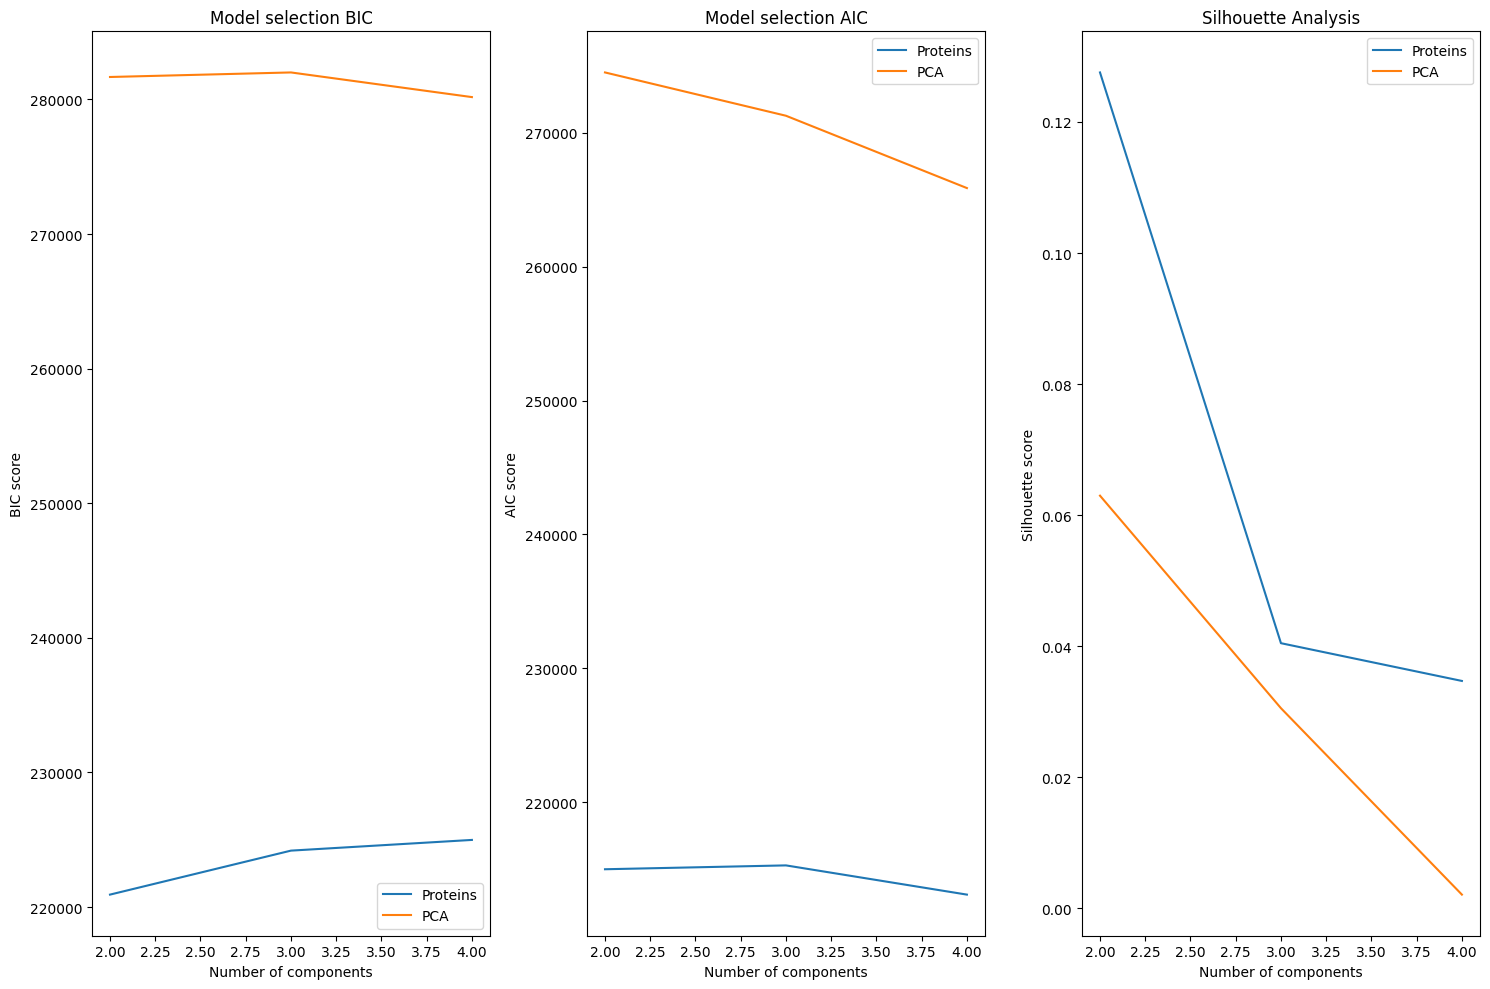

In [10]:
# Find optimal number of clusters - using a smaller range
n_components_range = range(2, 5)  # Reduced from 2-7 to 2-5
bic_proteins = []
aic_proteins = []
silhouette_proteins = []
bic_pca = []
aic_pca = []
silhouette_pca = []

for n_components in n_components_range:
    # Proteins
    gmm = GaussianMixture(n_components=n_components, random_state=42, 
                         max_iter=100, n_init=1)  # Added parameters for faster convergence
    labels = gmm.fit_predict(df_proteins_scaled)
    bic_proteins.append(gmm.bic(df_proteins_scaled))
    aic_proteins.append(gmm.aic(df_proteins_scaled))
    silhouette_proteins.append(silhouette_score(df_proteins_scaled, labels))
    
    # PCA
    gmm = GaussianMixture(n_components=n_components, random_state=42,
                         max_iter=100, n_init=1)  # Added parameters for faster convergence
    labels = gmm.fit_predict(df_pca_scaled)
    bic_pca.append(gmm.bic(df_pca_scaled))
    aic_pca.append(gmm.aic(df_pca_scaled))
    silhouette_pca.append(silhouette_score(df_pca_scaled, labels))

# Plot metrics
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))

ax1.plot(n_components_range, bic_proteins, label='Proteins')
ax1.plot(n_components_range, bic_pca, label='PCA')
ax1.set_xlabel('Number of components')
ax1.set_ylabel('BIC score')
ax1.set_title('Model selection BIC')
ax1.legend()

ax2.plot(n_components_range, aic_proteins, label='Proteins')
ax2.plot(n_components_range, aic_pca, label='PCA')
ax2.set_xlabel('Number of components')
ax2.set_ylabel('AIC score')
ax2.set_title('Model selection AIC')
ax2.legend()

ax3.plot(n_components_range, silhouette_proteins, label='Proteins')
ax3.plot(n_components_range, silhouette_pca, label='PCA')
ax3.set_xlabel('Number of components')
ax3.set_ylabel('Silhouette score')
ax3.set_title('Silhouette Analysis')
ax3.legend()

plt.tight_layout()
plt.show()


In [12]:
# Evaluate both protein and PCA-based clustering
from sklearn.metrics import f1_score, roc_auc_score

# Get PAD outcome
pad_outcome = df_hypertension['PAD_binary']

# Evaluate protein-based clustering
f1_proteins = f1_score(pad_outcome, cluster_labels_proteins)
auc_proteins = roc_auc_score(pad_outcome, cluster_labels_proteins)

print("\nProtein-based Clustering Evaluation:")
print(f"F1 Score: {f1_proteins:.3f}")
print(f"AUC Score: {auc_proteins:.3f}")

# Evaluate PCA-based clustering
f1_pca = f1_score(pad_outcome, cluster_labels_pca)
auc_pca = roc_auc_score(pad_outcome, cluster_labels_pca)

print("\nPCA-based Clustering Evaluation:")
print(f"F1 Score: {f1_pca:.3f}")
print(f"AUC Score: {auc_pca:.3f}")

# Analyze cluster centers
protein_centers = pd.DataFrame(
    gmm_proteins.means_,
    columns=df_proteins.columns  # Use the actual columns from df_proteins
)

pca_centers = pd.DataFrame(
    gmm_pca.means_,
    columns=df_pca.columns  # Use the actual columns from df_pca
)

# Print the most important features for distinguishing clusters
print("\nMost important proteins for cluster separation:")
protein_diffs = abs(protein_centers.iloc[0] - protein_centers.iloc[1]).sort_values(ascending=False)
print(protein_diffs.head())

print("\nMost important PCs for cluster separation:")
pca_diffs = abs(pca_centers.iloc[0] - pca_centers.iloc[1]).sort_values(ascending=False)
print(pca_diffs.head())


Protein-based Clustering Evaluation:
F1 Score: 0.173
AUC Score: 0.490

PCA-based Clustering Evaluation:
F1 Score: 0.185
AUC Score: 0.538

Most important proteins for cluster separation:
SPARC     0.563014
TNF       0.484975
FCRLB     0.442377
XCL1      0.377899
STXBP3    0.323759
dtype: float64

Most important PCs for cluster separation:
pc_16    0.530366
pc_12    0.515533
pc_9     0.477244
pc_10    0.392606
pc_31    0.345835
dtype: float64
